# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 3: Pre-Processing 2

Author: Patrick Smith

Date: 01/04/2024

Contact: patrick.b.smith@gmail.com

         *                 *                  *              *
                                                      *             *
                        *            *                             ___
  *               *                                          |     | |
        *              _________##                 *        / \    | |
                      @\\\\\\\\\##    *     |              |--o|===|-|
  *                  @@@\\\\\\\\##\       \|/|/            |---|   |p|
                    @@ @@\\\\\\\\\\\    \|\\|//|/     *   /     \  |b|
             *     @@@@@@@\\\\\\\\\\\    \|\|/|/         |  U    | |s|
                  @@@@@@@@@----------|    \\|//          |  K    |=| |                                                                                                                       

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Region                         | World region of the country of nationality for the individual.              | object   |
| Return type group              | Grouped type of return (enforced, voluntary, refused entry at port).         | object   |
| Return type                    | Specific type of return (enforced, voluntary, refused entry).               | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Number of returns              | Count of returns.                                                           | float64  |
| Visa type group                | Grouped type of sponsored work visa applied for.                            | object   |
| Visa type subgroup             | Detailed type of sponsored work visa applied for.                           | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Case type                      | Type of case (asylum, resettlement).                                       | object   |
| Case outcome group             | Grouped outcome of the case (granted protection, grant of other leave, refused, withdrawn). | object   |
| UASC                           | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child.       | object   |
| Host Country                   | Country where the individual first sought asylum for resettlement cases.    | object   |
| Location of application        | Location where the application was submitted.                               | object   |
| Applications                   | Number of applications made.                                               | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| SOC code                       | Standard Occupational Classification code.                                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Category of leave group        | Grouped category of extension applied for (work, study, family, other).     | object   |
| Category of leave              | Category of extension applied for.                                         | object   |
| Category of leave subgroup     | Detailed category of extension applied for.                                | object   |
| Current category of leave group| Grouped current category of leave (work, study, family, other).            | object   |
| Current category of leave      | Current category of leave.                                                 | object   |
| Previous category of leave group | Grouped previous category of leave (work, study, family, other).         | object   |
| Previous category of leave     | Previous category of leave.                                                | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| UK Region                      | The UK region in which the citizenship ceremony took place.                | object   |

## Table of Contents - Book 3

[Preprocessing: Case Outcome](#Case_Outcome) 

[Preprocessing: Visa Outcome](#Visa_Outcomes) 

[Preprocessing: Age](#Age) 

[Baseline Modelling](#B_Model)


## Data Loading

<div id='Load'></div>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

## Next Objective

1) Pre-Processing
2) Focus on dependent variable, case outcome
3) Further improve data quality by imputation
4) Begin baseline modelling
5) Split the data into train and test sets
6) Try several different simplier models to get started
7) Plots and univariate and bivariate distribution
8) Initial insights and conclusions to shareholders

Now the dataset is mostly cleanand has limited null values, we're going to focus focusing on the relevance of each feature 'Case outcome' without worrying about completeness until later

Our strategy for baseline modelling will be to use a simple model like logistic regression using both numerical and categorical variables

For categorical we can one-hot encode them later so we can use them in the machine model

In [2]:
#see max columns
pd.options.display.max_columns = None

Reading the data from book 2 and displaying a sample

In [3]:
import pandas as pd

file_path = r'C:\Users\kamik\Downloads\df_combined_EDA2.csv'

df_combined = pd.read_csv(file_path, low_memory=False)


In [4]:
df_combined.sample(5)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Visa type,Visa type subgroup,Applicant type,Applications,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Occupation,Industry,SOC code,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Category of leave group,Category of leave,Category of leave subgroup,Current category of leave group,Current category of leave,Previous category of leave group,Previous category of leave,Outcome,Appeals determined,Date,Application stage,Duration,Type of application,Geographical region,Location,Number of passengers refused entry at the border,General_Region,Total Application and Decisions
648905,2015,4,British overseas citizens,Other,NaN,NaN,Unknown,3,NaN,NaN,Work,Other work visas and exemptions,UK Ancestry,Main Applicant,0.0,Issued,1.0,Issued,Issued,Non-UASC,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,1.0
699764,2016,3,Zambia,Africa Sub-Saharan,NaN,NaN,Under 18,1,NaN,NaN,NaN,NaN,NaN,Main Applicant,0.0,Other Grants,1.0,Asylum Case,Grant of Other Leave,Non-UASC,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,1.0
842351,2019,1,Ivory Coast,Africa Sub-Saharan,NaN,NaN,Unknown,3,NaN,NaN,Family,Family,Family: Child (for immediate settlement),All,5.0,Issued,5.0,Issued,Issued,Non-UASC,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,5.0
389584,2011,3,Occupied Palestinian Territories,Middle East,NaN,NaN,18 to 29,3,NaN,NaN,Study,Other study,Short-term study (previously Student Visitor),Main Applicant,0.0,Issued,34.0,Issued,Issued,Non-UASC,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,34.0
1214173,2023,2,Trinidad and Tobago,America Central and South,Refused entry at port and subsequently departed,Other Returns,30 to 49,1,Home country,1.0,NaN,NaN,NaN,NaN,0.0,Refused,1.0,Refused,Refused,Non-UASC,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,America,0.0


Checking for duplicates again, we made a lot of imputations

In [5]:
df_combined.duplicated().sum()

16790

Ok great we can get rid of another 40K duplicates

In [6]:
clean_df = df_combined.drop_duplicates()

print(f"We have {clean_df.shape[0]} rows and {clean_df.shape[1]} columns with string, floats and integers in our clean data.")

We have 1301379 rows and 47 columns with string, floats and integers in our clean data.


Moving the data to clean_df again

Checking for nas

In [7]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                                 0.000000
Quarter                                              0.000000
Nationality                                          0.274851
Region                                               2.090779
Return type group                                   81.114334
Return type                                         81.114334
Age                                                  0.000000
Sex                                                  0.000000
Return destination group                            81.114334
Number of returns                                   81.114334
Visa type group                                     56.361286
Visa type                                           42.042864
Visa type subgroup                                  42.042864
Applicant type                                      48.380064
Applications                                         0.000000
Case outcome                                         6.997358
Decision

OK we can work on some of these now, then do the rest later:
Return type group                  73.352786
Return type                        73.352786
Return destination group           73.352786
Number of returns                  73.352786
Visa type group                    69.209805
Applicant type                     52.167666

In [8]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                                 0.000000
Quarter                                              0.000000
Nationality                                          0.000000
Region                                               0.000000
Return type group                                    0.000000
Return type                                          0.000000
Age                                                  0.000000
Sex                                                  0.000000
Return destination group                             0.000000
Number of returns                                    0.000000
Visa type group                                      0.000000
Visa type                                            0.000000
Visa type subgroup                                   0.000000
Applicant type                                       0.000000
Applications                                        71.582606
Case outcome                                         0.000000
Decision

Let's look at 'Grants' and 'Applications' now

In [9]:
clean_df['Grants'].value_counts()

Grants
0.0       1075763
1.0         98217
2.0         29992
3.0         15835
4.0         10301
           ...   
1114.0          1
794.0           1
855.0           1
1288.0          1
2203.0          1
Name: count, Length: 1064, dtype: int64

In [10]:
clean_df['Applications'].value_counts()

Applications
0.0        931561
1.0        121043
2.0         43614
3.0         24838
4.0         16831
            ...  
2383.0          1
13638.0         1
2396.0          1
18275.0         1
2758.0          1
Name: count, Length: 5278, dtype: int64

We still have a lot of 0s in Grants and Applications

Now are going to combine conditions for Age, so we can update for grants and total applications and decisions

We check NA values or values equal to 0 in each column
Apply the update, then calculate the number of rows updated

In [11]:
import numpy as np

condition_age_specific = (clean_df['Age'] == '18 to 29') | (clean_df['Age'] == 'Child')

#condition_grants_na_or_zero = clean_df['Grants'].isna() | (clean_df['Grants'] == 0)
condition_total_app_dec_na_or_zero = clean_df['Total Application and Decisions'].isna() | (clean_df['Total Application and Decisions'] == 0)
condition_applications_na_or_zero = clean_df['Applications'].isna() | (clean_df['Applications'] == 0)

#clean_df.loc[condition_age_specific & condition_grants_na_or_zero, 'Grants'] = clean_df.loc[condition_age_specific, 'Decisions']
clean_df.loc[condition_age_specific & condition_total_app_dec_na_or_zero, 'Total Application and Decisions'] = clean_df.loc[condition_age_specific, 'Decisions']
clean_df.loc[condition_age_specific & condition_applications_na_or_zero, 'Applications'] = clean_df.loc[condition_age_specific, 'Decisions']

#matching_rows_grants_updated = (condition_age_specific & condition_grants_na_or_zero).sum()
matching_rows_total_app_dec_updated = (condition_age_specific & condition_total_app_dec_na_or_zero).sum()
matching_rows_applications_updated = (condition_age_specific & condition_applications_na_or_zero).sum()

#print(f"Rows updated where 'Grants' was NA or 0: {matching_rows_grants_updated}")
print(f"Rows updated where 'Total Application and Decisions' was NA or 0: {matching_rows_total_app_dec_updated}")
print(f"Rows updated where 'Applications' was NA or 0: {matching_rows_applications_updated}")


Rows updated where 'Total Application and Decisions' was NA or 0: 113047
Rows updated where 'Applications' was NA or 0: 201233


Worked well - let's see how many 0s are in the df now

In [12]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                                 0.000000
Quarter                                              0.000000
Nationality                                          0.000000
Region                                               0.000000
Return type group                                    0.000000
Return type                                          0.000000
Age                                                  0.000000
Sex                                                  0.000000
Return destination group                             0.000000
Number of returns                                    0.000000
Visa type group                                      0.000000
Visa type                                            0.000000
Visa type subgroup                                   0.000000
Applicant type                                       0.000000
Applications                                        58.678755
Case outcome                                         0.000000
Decision

This made a meaningful difference

Let's look at Decisions now, one of our main numerical columns

In [13]:
clean_df['Decisions'].value_counts()

Decisions
1.0        382623
0.0        253588
2.0        142759
3.0         79509
4.0         52234
            ...  
2982.0          1
7171.0          1
2694.0          1
5129.0          1
20599.0         1
Name: count, Length: 7334, dtype: int64

And 'Case outcome', our dependent feature column

In [14]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  799898
Refused                 189795
Sponsored Work Visa     188741
Temporary Protection     15187
Withdrawn                10522
Resettlements             2738
Other Grants              2261
Name: count, dtype: int64

Now we're going to look at outcomes from the 'Case outcome' column

Then update 'Grants' to match 'Decisions' for specific outcomes, 'Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants'

For the others, Grants and Total Application and Decisions, we will match it with the other condition, from 'Decisions'

In [15]:
specific_outcomes = ['Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants']

for outcome in specific_outcomes:
    condition = clean_df['Case outcome'] == outcome
    clean_df.loc[condition, 'Grants'] = clean_df.loc[condition, 'Decisions']

other_conditions = ~clean_df['Case outcome'].isin(specific_outcomes)
clean_df.loc[other_conditions, ['Grants', 'Total Application and Decisions', 'Applications']] = clean_df.loc[other_conditions, 'Decisions']

updated_rows_specific_outcomes = clean_df[clean_df['Case outcome'].isin(specific_outcomes)]['Grants'].count()
updated_rows_other_outcomes = clean_df[other_conditions]['Grants'].count()

print(f"Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants') to match 'Decisions': {updated_rows_specific_outcomes}")
print(f"Rows updated for other outcomes to match 'Decisions': {updated_rows_other_outcomes}")

#REF: Chatgpt

Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants') to match 'Decisions': 208927
Rows updated for other outcomes to match 'Decisions': 1092452


In [16]:

# Condition where 'Number of passengers refused entry at the border' is not NA
condition_not_na = ~clean_df['Number of passengers refused entry at the border'].isna()

# Condition where 'Case outcome' is NA or 0
condition_case_outcome_na_or_zero = clean_df['Case outcome'].isna() | (clean_df['Case outcome'] == 0)

# Apply the conditions and update 'Decisions', 'Applications', and 'Case outcome'
clean_df.loc[condition_not_na & condition_case_outcome_na_or_zero, ['Decisions', 'Applications']] = clean_df.loc[condition_not_na & condition_case_outcome_na_or_zero, 'Number of passengers refused entry at the border']
clean_df.loc[condition_not_na & condition_case_outcome_na_or_zero, 'Case outcome'] = "Refused"

# Calculate the number of rows updated (for verification or reporting purposes)
matching_rows_updated = (condition_not_na & condition_case_outcome_na_or_zero).sum()

print(f"Rows updated where conditions matched: {matching_rows_updated}")


Rows updated where conditions matched: 14546


In [17]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  799898
Refused                 204341
Sponsored Work Visa     188741
Temporary Protection     15187
Withdrawn                10522
Resettlements             2738
Other Grants              2261
Name: count, dtype: int64

In [18]:
clean_df['Category of leave'].value_counts()

Category of leave
Worker (Previously Tier 2)              15901
Temporary Worker (Previously Tier 5)    11659
Name: count, dtype: int64

In [19]:
# Define the conditions for Worker or Temporary Worker
condition_worker = clean_df['Category of leave'] == 'Worker (Previously Tier 2)'
condition_temp_worker = clean_df['Category of leave'] == 'Temporary Worker (Previously Tier 5)'

# Combine conditions for either Worker or Temporary Worker
combined_condition = condition_worker | condition_temp_worker

# Update 'Case outcome' to "Sponsored Work Visa" for these conditions
clean_df.loc[combined_condition, 'Case outcome'] = "Sponsored Work Visa"

# Assuming 'Decisions' and 'Applications' should be updated in a specific manner (demonstration purpose)
# Here, you would place your logic for updating 'Decisions' and 'Applications'

# Calculate the number of rows updated for this specific condition
matching_rows_updated = combined_condition.sum()

print(f"Rows updated where conditions matched: {matching_rows_updated}")


Rows updated where conditions matched: 27560


In [20]:
#drop Category of leave group & Category of leave subgroup, Current category of leave group, Current category of leave,

In [21]:
clean_df['Visa type group'].value_counts()

Visa type group
Work                            210440
Other                           100837
Study                            95543
Family                           76934
Visitor                          44772
Dep. joining or accompanying     29916
Name: count, dtype: int64

In [22]:
clean_df['Visa type'].value_counts()

Visa type
Worker                                       220986
Temporary Worker                              83900
Family                                        76934
Other work visas and exemptions               57272
Sponsored study                               52060
Other temporary visas                         45047
Visitor                                       44772
Other study                                   43483
Investor, business development and talent     37023
Dep. joining or accompanying                  29916
EEA Family Permit                             25267
Other settlement visas                        18789
EU Settlement Scheme permits                   8555
Ukraine Visa Schemes                           2090
BN(O) route                                    1089
Name: count, dtype: int64

In [23]:
clean_df['Visa type subgroup'].value_counts(10)

Visa type subgroup
Skilled Worker                                  0.163234
Visitor                                         0.059921
Tier 4 - General Student                        0.041307
Family: Partner                                 0.039300
Other temporary visas                           0.035487
                                                  ...   
ECAA Businessperson                             0.000634
Secondment Worker (Global Business Mobility)    0.000207
Scale-up Worker                                 0.000201
Service Supplier (Global Business Mobility)     0.000123
Tier 1 - Other                                  0.000095
Name: proportion, Length: 76, dtype: float64

In [24]:
# Conditions for identifying rows with 'Visa type' as "Worker" or "Temporary Worker"
condition_worker_visa_type = clean_df['Visa type'] == 'Worker'
condition_temp_worker_visa_type = clean_df['Visa type'] == 'Temporary Worker'

# Update 'Visa type group' to "Work" for these conditions
clean_df.loc[condition_worker_visa_type | condition_temp_worker_visa_type, 'Visa type group'] = 'Work'

# Calculate the number of rows updated
matching_rows_visa_type_group_updated = (condition_worker_visa_type | condition_temp_worker_visa_type).sum()

print(f"Rows updated for 'Visa type group' to 'Work': {matching_rows_visa_type_group_updated}")


Rows updated for 'Visa type group' to 'Work': 304886


In [25]:
clean_df.loc[condition_worker_visa_type | condition_temp_worker_visa_type, 'Visa type'] = 'Worker'

In [26]:
clean_df['Outcome'].value_counts()

Outcome
Dismissed    6104
Allowed      4755
Withdrawn    2567
Name: count, dtype: int64

In [27]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  799898
Sponsored Work Visa     216301
Refused                 204341
Temporary Protection     15187
Withdrawn                10522
Resettlements             2738
Other Grants              2261
Name: count, dtype: int64

In [28]:
specific_outcomes = ['Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants', 'Withdrawn']

for outcome in specific_outcomes:
    condition = clean_df['Case outcome'] == outcome
    clean_df.loc[condition, 'Grants'] = clean_df.loc[condition, 'Decisions']

other_conditions = ~clean_df['Case outcome'].isin(specific_outcomes)
clean_df.loc[other_conditions, ['Grants', 'Total Application and Decisions', 'Applications']] = clean_df.loc[other_conditions, 'Decisions']

updated_rows_specific_outcomes = clean_df[clean_df['Case outcome'].isin(specific_outcomes)]['Grants'].count()
updated_rows_other_outcomes = clean_df[other_conditions]['Grants'].count()

print(f"Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants') to match 'Decisions': {updated_rows_specific_outcomes}")
print(f"Rows updated for other outcomes to match 'Decisions': {updated_rows_other_outcomes}")

#REF: Chatgpt

Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants') to match 'Decisions': 247009
Rows updated for other outcomes to match 'Decisions': 1054370


In [29]:
# Update 'Case outcome' based on 'Outcome' conditions
clean_df.loc[clean_df['Outcome'] == 'Dismissed', 'Case outcome'] = 'Refused'
clean_df.loc[clean_df['Outcome'] == 'Allowed', 'Case outcome'] = 'Grant'
clean_df.loc[clean_df['Outcome'] == 'Withdrawn', 'Case outcome'] = 'Withdrawn'

# For entries where 'Outcome' is 'Allowed', update 'Grants' to equal 'Applications'
# and set 'Case outcome' to 'Other Grants'
clean_df.loc[clean_df['Outcome'] == 'Allowed', 'Grants'] = clean_df.loc[clean_df['Outcome'] == 'Allowed', 'Applications']
clean_df.loc[clean_df['Outcome'] == 'Allowed', 'Case outcome'] = 'Other Grants'

# Assuming the rest of the logic remains similar, focusing on updating 'Grants' for specific outcomes
specific_outcomes = ['Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants', 'Withdrawn']

for outcome in specific_outcomes:
    condition = clean_df['Case outcome'] == outcome
    clean_df.loc[condition, 'Grants'] = clean_df.loc[condition, 'Decisions']

other_conditions = ~clean_df['Case outcome'].isin(specific_outcomes)
clean_df.loc[other_conditions, ['Grants', 'Total Application and Decisions', 'Applications']] = clean_df.loc[other_conditions, 'Decisions']

# Calculate updated rows for verification
updated_rows_specific_outcomes = clean_df[clean_df['Case outcome'].isin(specific_outcomes)]['Grants'].count()
updated_rows_other_outcomes = clean_df[other_conditions]['Grants'].count()

print(f"Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants', 'Withdrawn') to match 'Decisions': {updated_rows_specific_outcomes}")
print(f"Rows updated for other outcomes to match 'Decisions': {updated_rows_other_outcomes}")


Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants', 'Withdrawn') to match 'Decisions': 254331
Rows updated for other outcomes to match 'Decisions': 1047048


In [30]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  799898
Sponsored Work Visa     216301
Refused                 210445
Temporary Protection     15187
Withdrawn                13089
Other Grants              7016
Resettlements             2738
Name: count, dtype: int64

In [31]:
#drop Previous category of leave group, Date, Application stage, Duration, SOC code

In [32]:
# Column names to be dropped
columns_to_drop = [
    'Previous category of leave group', 'Date', 'Application stage', 
    'Duration', 'SOC code', 'Category of leave group', 
    'Category of leave subgroup', 'Current category of leave group', 
    'Current category of leave'
]

# Dropping the specified columns from clean_df
clean_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [33]:
clean_df.head()

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Visa type,Visa type subgroup,Applicant type,Applications,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Category of leave,Previous category of leave,Outcome,Appeals determined,Type of application,Geographical region,Location,Number of passengers refused entry at the border,General_Region,Total Application and Decisions
0,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,Main Applicant,2652.0,Issued,2652.0,Asylum Case,Grant of Other Leave,Total (pre-2006),NaN,2652.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,2652.0
1,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,Main Applicant,0.0,Temporary Protection,809.0,Asylum Case,Grant of Protection,Total (pre-2006),NaN,809.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,809.0
2,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,Main Applicant,15.0,Refused,15.0,Asylum Case,Refused,Total (pre-2006),NaN,15.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,15.0
3,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,Main Applicant,88.0,Refused,88.0,Asylum Case,Refused,Total (pre-2006),NaN,88.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,88.0
4,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,Main Applicant,609.0,Refused,609.0,Asylum Case,Refused,Total (pre-2006),NaN,609.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,609.0


In [34]:
clean_df['Case type'].value_counts()

Case type
Issued                 790284
Sponsored Work Visa    188741
Refused                152413
Asylum Case             74966
Resettlement Case        2738
Name: count, dtype: int64

In [35]:
clean_df['Visa type group'].value_counts()

Visa type group
Work                            399181
Other                           100837
Study                            95543
Family                           76934
Visitor                          44772
Dep. joining or accompanying     29916
Name: count, dtype: int64

In [36]:
# Condition where 'Case type' is 'Asylum Case'
condition_asylum_case = clean_df['Case type'] == 'Asylum Case'

# Update 'Visa type group', 'Visa type', 'Visa type subgroup', and 'Outcome' for this condition
clean_df.loc[condition_asylum_case, ['Visa type group', 'Visa type', 'Visa type subgroup', 'Outcome']] = 'Asylum Case'

# You might want to verify the updates or check how many rows were affected
updated_rows = condition_asylum_case.sum()
print(f"Rows updated where 'Case type' is 'Asylum Case': {updated_rows}")


Rows updated where 'Case type' is 'Asylum Case': 74966


In [37]:
# For 'Type of application' = "Visa" or "Extensions of stay", set 'Case outcome' to "Other grant"
condition_visa_or_extension = clean_df['Type of application'].isin(['Visa', 'Extensions of stay'])
clean_df.loc[condition_visa_or_extension, 'Case outcome'] = 'Other grant'

# For 'Type of application' = "Unknown", set 'Case outcome' to "Issued", 'Case type' to "Issued", 
# and 'Visa type group' to "Other"
condition_unknown = clean_df['Type of application'] == 'Unknown'
clean_df.loc[condition_unknown, ['Case outcome', 'Case type', 'Visa type group']] = ['Issued', 'Issued', 'Other']

# Verify the updates or check how many rows were affected for each condition
updated_visa_or_extension = condition_visa_or_extension.sum()
updated_unknown = condition_unknown.sum()

print(f"Rows updated where 'Type of application' is 'Visa' or 'Extensions of stay': {updated_visa_or_extension}")
print(f"Rows updated where 'Type of application' is 'Unknown': {updated_unknown}")


Rows updated where 'Type of application' is 'Visa' or 'Extensions of stay': 25867
Rows updated where 'Type of application' is 'Unknown': 1693


In [38]:
clean_df['Appeals determined'].value_counts()

Appeals determined
1.0      5081
2.0      2116
3.0      1258
4.0       814
5.0       549
         ... 
289.0       1
123.0       1
322.0       1
207.0       1
111.0       1
Name: count, Length: 210, dtype: int64

In [39]:
# Condition where 'Grants' is 0
condition_grants_zero = clean_df['Grants'] == 0

# Condition where 'Appeals determined' is not NA
condition_appeals_not_na = ~clean_df['Appeals determined'].isna()

# Combined condition: 'Grants' is 0 AND 'Appeals determined' is not NA
combined_condition = condition_grants_zero & condition_appeals_not_na

# Update 'Grants' where the combined condition is True
clean_df.loc[combined_condition, 'Grants'] = clean_df.loc[combined_condition, 'Appeals determined']

# Verify the updates or check how many rows were affected
updated_rows = combined_condition.sum()
print(f"Rows updated where 'Grants' was 0 and 'Appeals determined' was not NA: {updated_rows}")


Rows updated where 'Grants' was 0 and 'Appeals determined' was not NA: 13426


In [40]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                                 0.000000
Quarter                                              0.000000
Nationality                                          0.000000
Region                                               0.000000
Return type group                                    0.000000
Return type                                          0.000000
Age                                                  0.000000
Sex                                                  0.000000
Return destination group                             0.000000
Number of returns                                    0.000000
Visa type group                                      0.000000
Visa type                                            0.000000
Visa type subgroup                                   0.000000
Applicant type                                       0.000000
Applications                                        19.919485
Case outcome                                         0.000000
Decision

In [41]:
clean_df['Type of application'].value_counts()

Type of application
Visa                  14950
Extensions of stay    10917
Unknown                1693
Name: count, dtype: int64

In [42]:
clean_df['Geographical region'].value_counts()

Geographical region
Africa Sub-Saharan           4980
America Central and South    4528
Europe Other                 2662
Middle East                  2365
Asia South East              1659
Asia East                    1377
Asia South                   1187
Africa North                 1173
Oceania                       876
Asia Central                  819
EU 14                         709
America North                 479
Other                         414
EU 8                          368
EU Other                      237
EU 2                          104
Name: count, dtype: int64

In [43]:
# Update 'Region' with values from 'Geographical region' wherever 'Region' is NA
clean_df['Region'] = clean_df['Region'].fillna(clean_df['Geographical region'])

# Verify the update or check how many rows were affected
# This can be done by checking how many values in 'Region' are no longer NA
updated_rows = clean_df['Region'].notna().sum()
print(f"Rows in 'Region' after update: {updated_rows}")


Rows in 'Region' after update: 1297756


In [44]:
clean_df['Region'].value_counts()

Region
Africa Sub-Saharan           282030
America Central and South    156369
Europe Other                 131706
Asia South                   120176
Middle East                  115509
Asia South East               84563
EU 14                         80153
Asia East                     75114
Africa North                  63762
America North                 45228
Asia Central                  36878
Oceania                       34800
EU 8                          27911
Other                         20818
EU 2                          13663
EU Other                       9075
Other and unknown                 1
Name: count, dtype: int64

look at application type too

Nationality                                          0.274851
Region                                               2.090779


In [45]:
clean_df['Nationality'].value_counts()

Nationality
India                                                  40112
Pakistan                                               29280
United States                                          28705
Nigeria                                                25657
China                                                  24687
                                                       ...  
Wallis and Futuna (French)                                 1
St Martin (French Part)                                    1
St. Helena (British)                                       1
St Pierre and Miquelon (French)                            1
St Helena, Ascension and Tristan da Cunha (British)        1
Name: count, Length: 256, dtype: int64

In [46]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301379 entries, 0 to 1318168
Data columns (total 38 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   Year                                              1301379 non-null  int64  
 1   Quarter                                           1301379 non-null  int64  
 2   Nationality                                       1297756 non-null  object 
 3   Region                                            1297756 non-null  object 
 4   Return type group                                 232155 non-null   object 
 5   Return type                                       232155 non-null   object 
 6   Age                                               1301379 non-null  object 
 7   Sex                                               1301379 non-null  int64  
 8   Return destination group                          232155 non-null   object 
 

In [47]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  801591
Refused                 210445
Sponsored Work Visa     188741
Other grant              25867
Temporary Protection     15187
Withdrawn                13089
Other Grants              7016
Resettlements             2738
Name: count, dtype: int64

In [48]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                                 0.000000
Quarter                                              0.000000
Nationality                                          0.274851
Region                                               0.274851
Return type group                                   81.114334
Return type                                         81.114334
Age                                                  0.000000
Sex                                                  0.000000
Return destination group                            81.114334
Number of returns                                   81.114334
Visa type group                                     36.227297
Visa type                                           36.355733
Visa type subgroup                                  36.355733
Applicant type                                      48.380064
Applications                                         0.000000
Case outcome                                         2.784544
Decision

In [49]:
clean_df['Outcome'].value_counts()

Outcome
Asylum Case    74966
Dismissed       6104
Allowed         4755
Withdrawn       2567
Name: count, dtype: int64

In [50]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  801591
Refused                 210445
Sponsored Work Visa     188741
Other grant              25867
Temporary Protection     15187
Withdrawn                13089
Other Grants              7016
Resettlements             2738
Name: count, dtype: int64

In [51]:
clean_df['Case outcome group'].value_counts()

Case outcome group
Issued                  790284
Refused                 189795
Sponsored Work Visa     188741
Grant of Protection      19821
Withdrawn                13970
Grant of Other Leave      6531
Name: count, dtype: int64

In [52]:
clean_df['Case type'].value_counts()

Case type
Issued                 791977
Sponsored Work Visa    188741
Refused                152413
Asylum Case             74966
Resettlement Case        2738
Name: count, dtype: int64

In [53]:
# Fill 'Case outcome' with 'Case type' where they do not match
clean_df.loc[clean_df['Case outcome'] != clean_df['Case type'], 'Case outcome'] = clean_df['Case type']

# Specifically update 'Case outcome' for rows where 'Case type' is 'Asylum Case'
clean_df.loc[clean_df['Case type'] == 'Asylum Case', 'Case outcome'] = 'Asylum Case'

# Verification step (optional)
# Check if there are any rows where 'Case outcome' does not equal 'Case type' after the update
mismatch_after_update = clean_df[clean_df['Case outcome'] != clean_df['Case type']]
print(f"Number of rows where 'Case outcome' does not equal 'Case type' after update: {len(mismatch_after_update)}")

# Count how many 'Case outcome' are now 'Asylum Case'
asylum_case_count = (clean_df['Case outcome'] == 'Asylum Case').sum()
print(f"Number of 'Case outcome' updated to 'Asylum Case': {asylum_case_count}")


Number of rows where 'Case outcome' does not equal 'Case type' after update: 90544
Number of 'Case outcome' updated to 'Asylum Case': 74966


We can drop Case type now

In [54]:
clean_df.drop('Case type', axis=1, inplace=True)

In [55]:
# Fill NA values in 'Case outcome' with values from 'Case outcome group'
clean_df['Case outcome'] = clean_df['Case outcome'].fillna(clean_df['Case outcome group'])

# Optionally, verify the update by checking the count of NA values in 'Case outcome' after the operation
na_count_after_update = clean_df['Case outcome'].isna().sum()
print(f"Number of NA values in 'Case outcome' after update: {na_count_after_update}")


Number of NA values in 'Case outcome' after update: 90544


Now we drop Case outcome group

In [56]:
clean_df.drop('Case outcome group', axis=1, inplace=True)

In [57]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                                 0.000000
Quarter                                              0.000000
Nationality                                          0.274851
Region                                               0.274851
Return type group                                   81.114334
Return type                                         81.114334
Age                                                  0.000000
Sex                                                  0.000000
Return destination group                            81.114334
Number of returns                                   81.114334
Visa type group                                     36.227297
Visa type                                           36.355733
Visa type subgroup                                  36.355733
Applicant type                                      48.380064
Applications                                         0.000000
Case outcome                                         6.868922
Decision

In [58]:
clean_df['General_Region'].value_counts()

General_Region
Africa         339639
Asia           311689
Europe         258428
America        196590
Middle East    113144
Oceania         33924
Other           20404
Name: count, dtype: int64

In [59]:
clean_df['Region'].value_counts()

Region
Africa Sub-Saharan           282030
America Central and South    156369
Europe Other                 131706
Asia South                   120176
Middle East                  115509
Asia South East               84563
EU 14                         80153
Asia East                     75114
Africa North                  63762
America North                 45228
Asia Central                  36878
Oceania                       34800
EU 8                          27911
Other                         20818
EU 2                          13663
EU Other                       9075
Other and unknown                 1
Name: count, dtype: int64

In [60]:
# Adjusted mapping with "Other and unknown"
region_mapping = {
    'Africa Sub-Saharan': 'Africa',
    'America Central and South': 'America',
    'Europe Other': 'Europe',
    'Asia South': 'Asia',
    'Middle East': 'Middle East',
    'EU 14': 'Europe',
    'Asia South East': 'Asia',
    'Asia East': 'Asia',
    'Africa North': 'Africa',
    'America North': 'North America',
    'Asia Central': 'Asia',
    'Oceania': 'Oceania',
    'EU 8': 'Europe',
    'Other': 'Other',
    'EU 2': 'Europe',
    'EU Other': 'Europe',
    'Other and unknown': 'Other'  # Ensuring coverage for this category
}

clean_df['General_Region'] = clean_df['Region'].map(region_mapping)


In [61]:
clean_df['General_Region'].value_counts()

General_Region
Africa           345792
Asia             316731
Europe           262508
America          156369
Middle East      115509
North America     45228
Oceania           34800
Other             20819
Name: count, dtype: int64

In [62]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                                 0.000000
Quarter                                              0.000000
Nationality                                          0.274851
Region                                               0.274851
Return type group                                   81.114334
Return type                                         81.114334
Age                                                  0.000000
Sex                                                  0.000000
Return destination group                            81.114334
Number of returns                                   81.114334
Visa type group                                     36.227297
Visa type                                           36.355733
Visa type subgroup                                  36.355733
Applicant type                                      48.380064
Applications                                         0.000000
Case outcome                                         6.868922
Decision

In [63]:
# List of columns to be dropped
columns_to_drop = [
    'Category of leave',
    'Previous category of leave',
    'Outcome',
    'Appeals determined',
    'Type of application',
    'Geographical region',
    'Location',
    'Number of passengers refused entry at the border',
    'Application type'
]

# Dropping the specified columns from the DataFrame
clean_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [64]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                0.000000
Quarter                             0.000000
Nationality                         0.274851
Region                              0.274851
Return type group                  81.114334
Return type                        81.114334
Age                                 0.000000
Sex                                 0.000000
Return destination group           81.114334
Number of returns                  81.114334
Visa type group                    36.227297
Visa type                          36.355733
Visa type subgroup                 36.355733
Applicant type                     48.380064
Applications                        0.000000
Case outcome                        6.868922
Decisions                           0.000000
UASC                                6.997358
Grants                              0.000000
Occupation                          0.000000
Industry                            0.000000
Occ. major group                    0.000000
Occ. sub-m

In [65]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                 791977
Sponsored Work Visa    188741
Refused                152413
Asylum Case             74966
Resettlement Case        2738
Name: count, dtype: int64

Look at percentage of 0s again

In [66]:
clean_df[df_combined['Case outcome'].isna()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Visa type,Visa type subgroup,Applicant type,Applications,Case outcome,Decisions,UASC,Grants,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region,Total Application and Decisions
11178,2004,1,Algeria,Africa North,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,248.0,NaN,248.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Africa,248.0
11179,2004,1,Egypt,Africa North,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,125.0,NaN,125.0,NaN,125.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Africa,125.0
11180,2004,1,Libya,Africa North,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,104.0,NaN,104.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Africa,104.0
11181,2004,1,Mauritania,Africa North,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,8.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Africa,8.0
11182,2004,1,Morocco,Africa North,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,199.0,NaN,199.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Africa,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318164,2023,4,Vietnam,Asia South East,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,30.0,NaN,30.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,30.0
1318165,2023,4,Vietnam,Asia South East,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN,7.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,7.0
1318166,2023,4,Zambia,Africa Sub-Saharan,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,4.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Africa,4.0
1318167,2023,4,Zimbabwe,Africa Sub-Saharan,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Africa,1.0


In [67]:
# Filter the DataFrame for rows where both 'Nationality' and 'Region' are NA
na_nationality_region_df = df_combined[df_combined['Nationality'].isna() & df_combined['Region'].isna()]

na_nationality_region_df.sample(5)


,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Visa type,Visa type subgroup,Applicant type,Applications,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Occupation,Industry,SOC code,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Category of leave group,Category of leave,Category of leave subgroup,Current category of leave group,Current category of leave,Previous category of leave group,Previous category of leave,Outcome,Appeals determined,Date,Application stage,Duration,Type of application,Geographical region,Location,Number of passengers refused entry at the border,General_Region,Total Application and Decisions
986268,2021,2,NaN,NaN,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,10.0,NaN,NaN,NaN,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Worker (Previously Tier 2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extensions of stay,NaN,NaN,NaN,NaN,10.0
1176956,2022,4,NaN,NaN,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Temporary Worker (Previously Tier 5),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visa,NaN,NaN,NaN,NaN,6.0
852402,2019,1,NaN,NaN,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,16.0,NaN,NaN,NaN,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Temporary Worker (Previously Tier 5),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extensions of stay,NaN,NaN,NaN,NaN,16.0
852385,2019,1,NaN,NaN,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,2549.0,NaN,2549.0,NaN,NaN,NaN,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Worker (Previously Tier 2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extensions of stay,NaN,NaN,NaN,NaN,2549.0
488340,2013,1,NaN,NaN,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,NaN,NaN,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,NaN,Temporary Worker (Previously Tier 5),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extensions of stay,NaN,NaN,NaN,NaN,8.0


In [68]:
# Condition where 'Nationality' is not NA
condition_nationality_not_na = clean_df['Nationality'].notna()

# Condition where 'Total Application and Decisions' is greater than 1
condition_total_app_dec_gt_1 = clean_df['Total Application and Decisions'] > 1

# Combined condition for both criteria being true
combined_condition = condition_nationality_not_na & condition_total_app_dec_gt_1

# Capture the count of 'Case outcome' as "Issued" before the update for accuracy
before_update_count = (clean_df['Case outcome'] == "Issued").sum()

# Update 'Case outcome' to "Issued" where the combined condition is met
clean_df.loc[combined_condition, 'Case outcome'] = "Issued"

# Capture the count of 'Case outcome' as "Issued" after the update
after_update_count = (clean_df['Case outcome'] == "Issued").sum()

# Calculate the number of rows updated
updated_rows = after_update_count - before_update_count

print(f"Number of 'Case outcome' rows updated to 'Issued': {updated_rows}")


Number of 'Case outcome' rows updated to 'Issued': 203776


In [84]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                0.000000
Quarter                             0.000000
Nationality                         0.274851
Region                              0.274851
Return type group                  81.114334
Return type                        81.114334
Age                                 0.000000
Sex                                 0.000000
Return destination group           81.114334
Number of returns                  81.114334
Visa type group                     0.000000
Visa type                          36.355733
Visa type subgroup                  0.000000
Applicant type                     48.380064
Applications                        0.000000
Case outcome                        2.648750
Decisions                           0.000000
UASC                                6.997358
Grants                              0.000000
Occupation                          0.000000
Industry                            0.000000
Occ. major group                    0.000000
Occ. sub-m

In [72]:
clean_df['Visa type'].value_counts()

Visa type
Worker                                       304886
Family                                        76934
Asylum Case                                   74966
Other work visas and exemptions               57272
Sponsored study                               52060
Other temporary visas                         45047
Visitor                                       44772
Other study                                   43483
Investor, business development and talent     37023
Dep. joining or accompanying                  29916
EEA Family Permit                             25267
Other settlement visas                        18789
EU Settlement Scheme permits                   8555
Ukraine Visa Schemes                           2090
BN(O) route                                    1089
Name: count, dtype: int64

In [73]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                 995753
Sponsored Work Visa    154795
Refused                 81727
Asylum Case             33205
Resettlement Case         984
Name: count, dtype: int64

In [74]:
clean_df['Visa type'].value_counts()

Visa type
Worker                                       304886
Family                                        76934
Asylum Case                                   74966
Other work visas and exemptions               57272
Sponsored study                               52060
Other temporary visas                         45047
Visitor                                       44772
Other study                                   43483
Investor, business development and talent     37023
Dep. joining or accompanying                  29916
EEA Family Permit                             25267
Other settlement visas                        18789
EU Settlement Scheme permits                   8555
Ukraine Visa Schemes                           2090
BN(O) route                                    1089
Name: count, dtype: int64

In [75]:
clean_df['Visa type subgroup'].value_counts()

Visa type subgroup
Skilled Worker                                  121966
Asylum Case                                      74966
Visitor                                          44772
Tier 4 - General Student                         30864
Family: Partner                                  29364
                                                 ...  
ECAA Businessperson                                474
Secondment Worker (Global Business Mobility)       155
Scale-up Worker                                    150
Service Supplier (Global Business Mobility)         92
Tier 1 - Other                                      71
Name: count, Length: 77, dtype: int64

In [76]:
clean_df['Occ. major group'].value_counts()

Occ. major group
Non-Work Visa Related Case Outcome                  1112638
professional occupations                              93598
associate professional and technical occupations      47471
managers, directors and senior officials              24219
skilled trades occupations                             9756
caring, leisure and other service occupations          6657
administrative and secretarial occupations             3696
elementary occupations                                 1582
sales and customer service occupations                 1303
process, plant and machine operatives                   443
personal service occupations                             10
managers and senior officials                             6
Name: count, dtype: int64

In [77]:
clean_df['Occ. sub-major group'].value_counts()

Occ. sub-major group
Non-Work Visa Related Case Outcome                             1112638
science, research, engineering and technology professionals      45497
business, media and public service professionals                 32776
business and public service associate professionals              28447
corporate managers and directors                                 21435
culture, media and sports occupations                            12095
health professionals                                             11615
caring personal service occupations                               5874
textiles, printing and other skilled trades                       4216
science, engineering and technology associate professionals       3829
teaching and educational professionals                            3702
health and social care associate professionals                    2954
other managers and proprietors                                    2784
administrative occupations                              

In [78]:
clean_df['Occ. minor group'].value_counts()

Occ. minor group
Non-Work Visa Related Case Outcome                             1112638
information technology and telecommunications professionals      20019
business, research and administrative professionals              17506
engineering professionals                                        15321
sales, marketing and related associate professionals             13229
                                                                ...   
conservation associate professionals                                 2
therapists                                                           2
protective service officers                                          2
business and statistical professionals                               2
elementary sales occupations                                         1
Name: count, Length: 98, dtype: int64

In [79]:
clean_df['Occ. unit group'].value_counts()

Occ. unit group
Non-Work Visa Related Case Outcome                    1112638
programmers and software development professionals       8416
management consultants and business analysts             7535
sales accounts and business development managers         6202
finance and investment analysts and advisers             4837
                                                       ...   
sports and fitness occupations n.e.c.                       2
conservation and environmental protection officers          2
rail travel assistants                                      2
window cleaners                                             1
elementary sales occupations n.e.c.                         1
Name: count, Length: 321, dtype: int64

In [80]:
# Condition where 'Visa type subgroup' is NA
condition_visa_type_subgroup_na = clean_df['Visa type subgroup'].isna()

# Assuming "Occ." refers to either "Occ. minor group" or "Occ. major group", 
# and you want to fill in with "Occ. minor group" as an example:
# Update 'Visa type subgroup' with values from 'Occ. minor group' where 'Visa type subgroup' is NA
clean_df.loc[condition_visa_type_subgroup_na, 'Visa type subgroup'] = clean_df.loc[condition_visa_type_subgroup_na, 'Occ. minor group']

# To verify the update, check how many rows now have a non-NA 'Visa type subgroup'
updated_rows_count = clean_df['Visa type subgroup'].notna().sum()
print(f"Rows with a NA 'Visa type subgroup' after update: {updated_rows_count}")


Rows with a non-NA 'Visa type subgroup' after update: 1301379


In [81]:
clean_df['Visa type subgroup'].value_counts()

Visa type subgroup
Non-Work Visa Related Case Outcome              479230
Skilled Worker                                  121966
Asylum Case                                      74966
Visitor                                          44772
Tier 4 - General Student                         30864
                                                 ...  
ECAA Businessperson                                474
Secondment Worker (Global Business Mobility)       155
Scale-up Worker                                    150
Service Supplier (Global Business Mobility)         92
Tier 1 - Other                                      71
Name: count, Length: 78, dtype: int64

In [82]:
# Condition where 'Visa type group' is NA
condition_visa_type_group_na = clean_df['Visa type group'].isna()

# Assuming we're updating 'Visa type group' with 'Occ. major group' values
# Update 'Visa type group' with values from 'Occ. major group' where 'Visa type group' is NA
clean_df.loc[condition_visa_type_group_na, 'Visa type group'] = clean_df.loc[condition_visa_type_group_na, 'Occ. major group']

# To verify the update, let's check how many rows now have a non-NA 'Visa type group'
updated_rows_count = clean_df['Visa type group'].notna().sum()
print(f"Rows with a NA 'Visa type group' after update: {updated_rows_count}")


Rows with a non-NA 'Visa type group' after update: 1301379


In [83]:
clean_df['Visa type group'].value_counts()

Visa type group
Non-Work Visa Related Case Outcome    477537
Work                                  399181
Other                                 102530
Study                                  95543
Family                                 76934
Asylum Case                            74966
Visitor                                44772
Dep. joining or accompanying           29916
Name: count, dtype: int64

In [85]:
# Condition where 'Visa type' is NA
condition_visa_type_na = clean_df['Visa type'].isna()

# Update 'Visa type' with values from 'Occ. major group' where 'Visa type' is NA
clean_df.loc[condition_visa_type_na, 'Visa type'] = clean_df.loc[condition_visa_type_na, 'Occ. major group']

# To verify the update, let's check how many rows now have a non-NA 'Visa type'
updated_rows_count = clean_df['Visa type'].notna().sum()
print(f"Rows with a non-NA 'Visa type' after update: {updated_rows_count}")


Rows with a non-NA 'Visa type' after update: 1301379


In [86]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                0.000000
Quarter                             0.000000
Nationality                         0.274851
Region                              0.274851
Return type group                  81.114334
Return type                        81.114334
Age                                 0.000000
Sex                                 0.000000
Return destination group           81.114334
Number of returns                  81.114334
Visa type group                     0.000000
Visa type                           0.000000
Visa type subgroup                  0.000000
Applicant type                     48.380064
Applications                        0.000000
Case outcome                        2.648750
Decisions                           0.000000
UASC                                6.997358
Grants                              0.000000
Occupation                          0.000000
Industry                            0.000000
Occ. major group                    0.000000
Occ. sub-m

In [90]:
# List of columns to be dropped
columns_to_drop = [
    'Return type group',
    'Return type',
    'Return destination group',
    'Number of returns',
    'Applicant type',
    'UASC',
    'Occ. major group',
    'Occ. sub-major group',
    'Occ. minor group',
    'Occ. unit group'
]

# Dropping the extended list of specified columns from the DataFrame
clean_df.drop(columns=columns_to_drop, axis=1, inplace=True)

NameError: name 'clean_df' is not defined

In [21]:
clean_df.isna().sum()/df_combined.shape[0]*100

NameError: name 'clean_df' is not defined

In [92]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Age                                 0.000000
Sex                                 0.000000
Visa type group                     0.000000
Visa type                           0.000000
Visa type subgroup                  0.000000
Applications                       19.919485
Case outcome                        0.000000
Decisions                          18.368362
Grants                             17.336687
Occupation                          0.000000
Industry                            0.000000
General_Region                      0.000000
Total Application and Decisions    18.368362
dtype: float64


Checking uniques

In [93]:
clean_df.nunique()

Year                                 23
Quarter                               4
Nationality                         256
Region                               17
Age                                   7
Sex                                   3
Visa type group                       8
Visa type                            16
Visa type subgroup                   78
Applications                       7334
Case outcome                          5
Decisions                          7334
Grants                             7334
Occupation                          325
Industry                             23
General_Region                        8
Total Application and Decisions    7334
dtype: int64

We can see that grants and applications have the same unique numbers, occupation has a lot of uniques well

In future iterations we can reduce the number of nationality by setting minimums

We can also look at dropping more columns, such as Grants or Applications

Other columns we can improve through further imputations are: Return destination group, Number of returns, Application type, and Return Type

OK let's move on to baseline modelling

In [94]:
clean_df.to_csv('C:/Users/kamik/Downloads/clean_df_model.csv', index=False)

In [1]:
import pandas as pd

file_path = r'C:\Users\patri\Downloads\clean_df_model.csv'

df_model = pd.read_csv(file_path, low_memory=False)


In [2]:
df_model.head()

,Year,Quarter,Nationality,Region,Age,Sex,Visa type group,Visa type,Visa type subgroup,Applications,Case outcome,Decisions,Grants,Occupation,Industry,General_Region,Total Application and Decisions
0,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,Asylum Case,Asylum Case,2652.0,Issued,2652.0,2652.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,2652.0
1,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,Asylum Case,Asylum Case,0.0,Issued,809.0,809.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,809.0
2,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,Asylum Case,Asylum Case,15.0,Issued,15.0,15.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,15.0
3,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,Asylum Case,Asylum Case,88.0,Issued,88.0,88.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,88.0
4,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,Asylum Case,Asylum Case,609.0,Issued,609.0,609.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,609.0


In [27]:
df_model['Visa type group'].value_counts()

Visa type group
Non-Work Visa Related Case Outcome    477537
Work                                  399181
Other                                 102530
Study                                  95543
Family                                 76934
Asylum Case                            74966
Visitor                                44772
Dep. joining or accompanying           29916
Name: count, dtype: int64

In [30]:
df_model['Visa type'].value_counts()

Visa type
Non-Work Visa Related Case Outcome           479230
Worker                                       304886
Family                                        76934
Asylum Case                                   74966
Other work visas and exemptions               57272
Sponsored study                               52060
Other temporary visas                         45047
Visitor                                       44772
Other study                                   43483
Investor, business development and talent     37023
Dep. joining or accompanying                  29916
EEA Family Permit                             25267
Other settlement visas                        18789
EU Settlement Scheme permits                   8555
Ukraine Visa Schemes                           2090
BN(O) route                                    1089
Name: count, dtype: int64

In [3]:
visa_mapping = {
    "Worker": "Work-Related Visas",
    "Other work visas and exemptions": "Work-Related Visas",
    "Sponsored study": "Study-Related Visas",
    "Other study": "Study-Related Visas",
    "Family": "Family-Related Visas",
    "Dep. joining or accompanying": "Family-Related Visas",
    "EEA Family Permit": "Family-Related Visas",
    "Investor, business development and talent": "Settlement and Talent Visas",
    "Other settlement visas": "Settlement and Talent Visas",
    "EU Settlement Scheme permits": "Settlement and Talent Visas",
    "BN(O) route": "Settlement and Talent Visas",
    "Other temporary visas": "Temporary and Other Visas",
    "Visitor": "Temporary and Other Visas",
    "Non-Work Visa Related Case Outcome": "Temporary and Other Visas",
    "Ukraine Visa Schemes": "Special Schemes",
    "Asylum Case": "Asylum Cases"
}

# Using 'df_model' as the DataFrame name
df_model['Visa type'] = df_model['Visa type'].map(visa_mapping)

# Checking if there are any Visa types not mapped (they would appear as NaN)
unmapped = df_model[df_model['Visa type'].isna()]
if not unmapped.empty:
    print("There are unmapped Visa types. Please check the mapping.")
else:
    print("All Visa types successfully mapped.")


All Visa types successfully mapped.


In [4]:
df_model['Visa type'].value_counts()

Visa type
Temporary and Other Visas      569049
Work-Related Visas             362158
Family-Related Visas           132117
Study-Related Visas             95543
Asylum Cases                    74966
Settlement and Talent Visas     65456
Special Schemes                  2090
Name: count, dtype: int64

In [28]:
df_model['Case outcome'].value_counts()

Case outcome
Issued                 995753
Sponsored Work Visa    154795
Refused                 81727
Asylum Case             33205
Resettlement Case         984
Name: count, dtype: int64

In [11]:
# Example mappings from "Visa type" categories to new outcomes
visa_type_to_outcome = {
    "Temporary and Other Visas": "Temporary Visa Issued",
    "Work-Related Visas": "Sponsored Work Visa",  # This seems to be a specific request
    "Family-Related Visas": "Family Visa Issued",
    "Study-Related Visas": "Study Visa Issued",
    "Asylum Cases": "Asylum Case Processed",
    "Settlement and Talent Visas": "Settlement Visa Issued",
    "Special Schemes": "Special Scheme Processed"
}

# Assuming 'Visa type' in df_model directly corresponds to these categories
# If 'Visa type' is already consolidated into these categories, use it directly; otherwise, adjust the logic to match actual 'Visa type' values to these categories

# Function to update 'Case outcome' based on 'Visa type'
def update_case_outcome(row):
    if row['Case outcome'] == 'Issued':
        # Map the 'Visa type' to a new 'Case outcome' if one exists in our mapping
        return visa_type_to_outcome.get(row['Visa type'], 'Issued')  # Default to 'Issued' if no mapping exists
    else:
        # If not 'Issued', return the original 'Case outcome'
        return row['Case outcome']

# Apply the function and create a new column for the updated outcomes
df_model['Case outcome'] = df_model.apply(update_case_outcome, axis=1)

# Verify the changes with value counts
print(df_model['Case outcome'].value_counts())


Case outcome
Temporary Visa Issued       451423
Sponsored Work Visa         362158
Family Visa Issued          132117
Study Visa Issued            95543
Refused                      81727
Settlement Visa Issued       65456
Asylum Case Processed        41761
NA                           34915
Asylum Case                  33205
Special Scheme Processed      2090
Resettlement Case              984
Name: count, dtype: int64


In [12]:
df_model['Case outcome'].value_counts()

Case outcome
Temporary Visa Issued       451423
Sponsored Work Visa         362158
Family Visa Issued          132117
Study Visa Issued            95543
Refused                      81727
Settlement Visa Issued       65456
Asylum Case Processed        41761
NA                           34915
Asylum Case                  33205
Special Scheme Processed      2090
Resettlement Case              984
Name: count, dtype: int64

In [15]:
# Assuming df_model has 'Visa type group' and 'Case outcome' columns correctly set up

# Define a function to apply your specific update rules
def update_case_outcome(row):
    if row['Visa type group'] == 'Work':
        return 'Sponsored Work Visa'
    elif row['Visa type group'] == 'Visitor':
        # Assuming we directly map 'Visitor' visa type group to a 'Visitor Visa Issued' outcome
        # Update this logic based on your specific needs
        return 'Visitor Visa Issued'
    elif row['Case outcome'] in ['Asylum Case Processed', 'Asylum Case']:
        return 'Asylum Case'
    elif row['Case outcome'] in ['Special Scheme Processed', 'Resettlement Case']:
        return 'Settlement Visa Issued'
    else:
        # For all other cases, return the current 'Case outcome'
        return row['Case outcome']

# Apply the update function across the DataFrame
df_model['Case outcome'] = df_model.apply(update_case_outcome, axis=1)

# Verify the changes with value counts
print(df_model['Case outcome'].value_counts())


Case outcome
Temporary Visa Issued     406651
Sponsored Work Visa       399181
Family Visa Issued        132117
Study Visa Issued          95543
Refused                    81727
Asylum Case                74966
Visitor Visa Issued        44772
NA                         34915
Settlement Visa Issued     31507
Name: count, dtype: int64


In [16]:
# Update 'NA' outcomes to 'Issued'
df_model['Case outcome'] = df_model['Case outcome'].replace('NA', 'Issued')

# Verify the changes with value counts
print(df_model['Case outcome'].value_counts())


Case outcome
Temporary Visa Issued     406651
Sponsored Work Visa       399181
Family Visa Issued        132117
Study Visa Issued          95543
Refused                    81727
Asylum Case                74966
Visitor Visa Issued        44772
Issued                     34915
Settlement Visa Issued     31507
Name: count, dtype: int64


In [10]:
df_model.isna().sum()/df_model.shape[0]*100

Year                               0.000000
Quarter                            0.000000
Nationality                        0.278397
Region                             0.278397
Age                                0.000000
Sex                                0.000000
Visa type group                    0.000000
Visa type                          0.000000
Visa type subgroup                 0.000000
Applications                       0.000000
Case outcome                       0.000000
Decisions                          0.000000
Grants                             0.000000
Occupation                         0.000000
Industry                           0.000000
General_Region                     0.278397
Total Application and Decisions    0.000000
Updated Case Outcome               0.000000
dtype: float64

In [7]:
df_model['Case outcome'].value_counts()

Case outcome
Issued                 995753
Sponsored Work Visa    154795
Refused                 81727
NA                      34915
Asylum Case             33205
Resettlement Case         984
Name: count, dtype: int64

In [17]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Data columns (total 18 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1301379 non-null  int64  
 1   Quarter                          1301379 non-null  int64  
 2   Nationality                      1297756 non-null  object 
 3   Region                           1297756 non-null  object 
 4   Age                              1301379 non-null  object 
 5   Sex                              1301379 non-null  int64  
 6   Visa type group                  1301379 non-null  object 
 7   Visa type                        1301379 non-null  object 
 8   Visa type subgroup               1301379 non-null  object 
 9   Applications                     1301379 non-null  float64
 10  Case outcome                     1301379 non-null  object 
 11  Decisions                        1301379 non-null 

In [6]:
# First, calculate the count of 'Decisions' that are not zero before the update, for accuracy
before_update_count = (df_model['Decisions'] != 0).sum()

# Perform the update
condition = (df_model['Applications'] != 0) & (df_model['Decisions'] == 0)
df_model.loc[condition, 'Decisions'] = df_model.loc[condition, 'Applications']

# Calculate the count of 'Decisions' that are not zero after the update
after_update_count = (df_model['Decisions'] != 0).sum()

# Calculate the number of rows updated
updated_rows_count = after_update_count - before_update_count
print(f"Rows with 'Decisions' updated from 'Applications': {updated_rows_count}")


Rows with 'Decisions' updated from 'Applications': 0


OK let's just delete Applications and Total Application and Decisions

In [18]:
# List of columns to be dropped
columns_to_drop = [
    'Applications',
    'Total Application and Decisions',
     'Visa type group',
     'Visa type',
     'Visa type subgroup',
     'Grants'
]

# Dropping the extended list of specified columns from the DataFrame
df_model.drop(columns=columns_to_drop, axis=1, inplace=True)

In [19]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Year            1301379 non-null  int64  
 1   Quarter         1301379 non-null  int64  
 2   Nationality     1297756 non-null  object 
 3   Region          1297756 non-null  object 
 4   Age             1301379 non-null  object 
 5   Sex             1301379 non-null  int64  
 6   Case outcome    1301379 non-null  object 
 7   Decisions       1301379 non-null  float64
 8   Grants          1301379 non-null  float64
 9   Occupation      1301379 non-null  object 
 10  Industry        1301379 non-null  object 
 11  General_Region  1297756 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 119.1+ MB


In [20]:
# Fill NAs with "Unknown" for specified columns
df_model['Nationality'] = df_model['Nationality'].fillna("Unknown")
df_model['Region'] = df_model['Region'].fillna("Unknown")
df_model['General_Region'] = df_model['General_Region'].fillna("Unknown")

# Optionally, verify the fill operation
# This checks the number of NA values in each column after filling, which should be 0
na_count_nationality = df_model['Nationality'].isna().sum()
na_count_region = df_model['Region'].isna().sum()
na_count_general_region = df_model['General_Region'].isna().sum()

print(f"NA count in 'Nationality' after fill: {na_count_nationality}")
print(f"NA count in 'Region' after fill: {na_count_region}")
print(f"NA count in 'General_Region' after fill: {na_count_general_region}")


NA count in 'Nationality' after fill: 0
NA count in 'Region' after fill: 0
NA count in 'General_Region' after fill: 0


In [24]:
df_model.isna().sum()/df_model.shape[0]*100

Year              0.0
Quarter           0.0
Nationality       0.0
Region            0.0
Age               0.0
Sex               0.0
Case outcome      0.0
Decisions         0.0
Occupation        0.0
Industry          0.0
General_Region    0.0
dtype: float64

In [25]:
df_model.to_csv('C:/Users/patri/Downloads/df_model.csv', index=False)

### Analyzing Patterns

<div id='Patterns'></div>

First we will select columns with low to no missing values for the baseline model

We will create a new DataFrame, called model_df, with selected columns, we can add and remove them later if neccesary

In [1]:
import pandas as pd

file_path = r'C:\Users\kamik\Downloads\df_model.csv'

model_df = pd.read_csv(file_path, low_memory=False)


Let's take a look at what the df looks like, per sample

In [2]:
model_df.head()


,Year,Quarter,Nationality,Region,Age,Sex,Case outcome,Decisions,Occupation,Industry,General_Region
0,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,2652.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
1,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,809.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
2,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,15.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
3,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,88.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
4,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,609.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia


In [33]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Year                1301379 non-null  int64  
 1   Quarter             1301379 non-null  int64  
 2   Nationality         1301379 non-null  object 
 3   Region              1301379 non-null  object 
 4   Age                 1301379 non-null  object 
 5   Sex                 1301379 non-null  int64  
 6   Visa type group     1301379 non-null  object 
 7   Visa type           1301379 non-null  object 
 8   Visa type subgroup  1301379 non-null  object 
 9   Case outcome        1301379 non-null  object 
 10  Decisions           1301379 non-null  float64
 11  Occupation          1301379 non-null  object 
 12  Industry            1301379 non-null  object 
 13  General_Region      1301379 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 139.0+ MB


In [16]:
model_df.nunique()

Year                    23
Quarter                  4
Nationality            257
Region                  18
Age                      7
Sex                      3
Visa type group          8
Visa type               16
Visa type subgroup      78
Case outcome             6
Decisions             7334
Occupation             325
Industry                23
General_Region           9
dtype: int64

In [5]:
shape = model_df.shape

# Print the shape
print(f"The shape of the DataFrame is: {shape}")

The shape of the DataFrame is: (1301379, 14)


Let's also make a numeric_df to extract all the integers and floats

This is because many other rows are categorical and objects

In [4]:
numeric_df = model_df.select_dtypes(include=['int64', 'float64'])
categorical_df = model_df.select_dtypes(include=['object'])


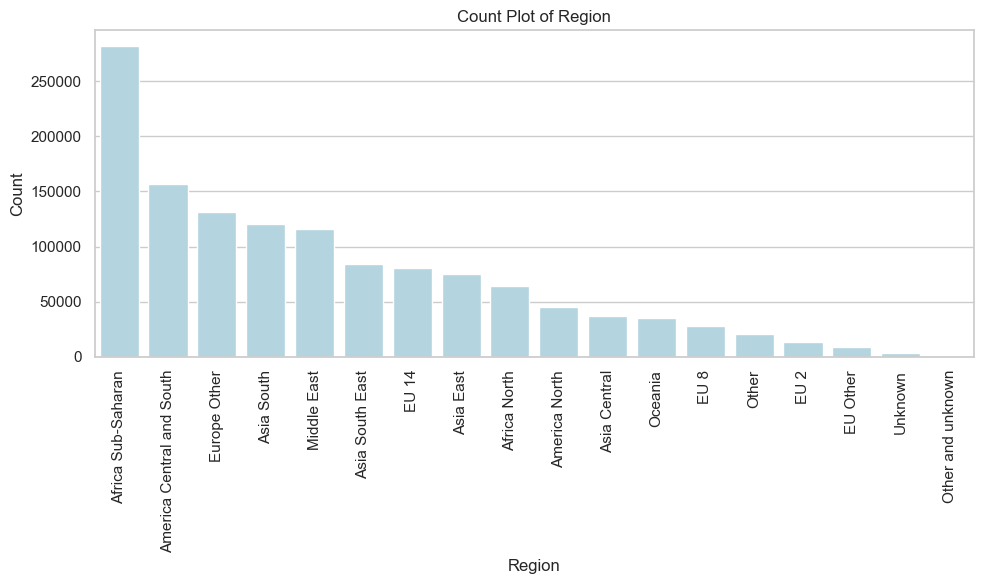

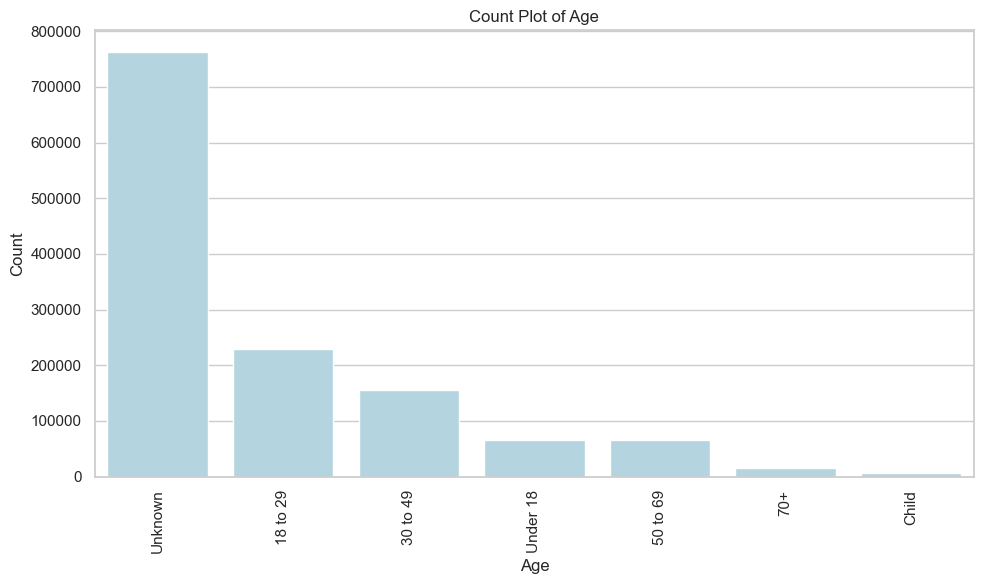

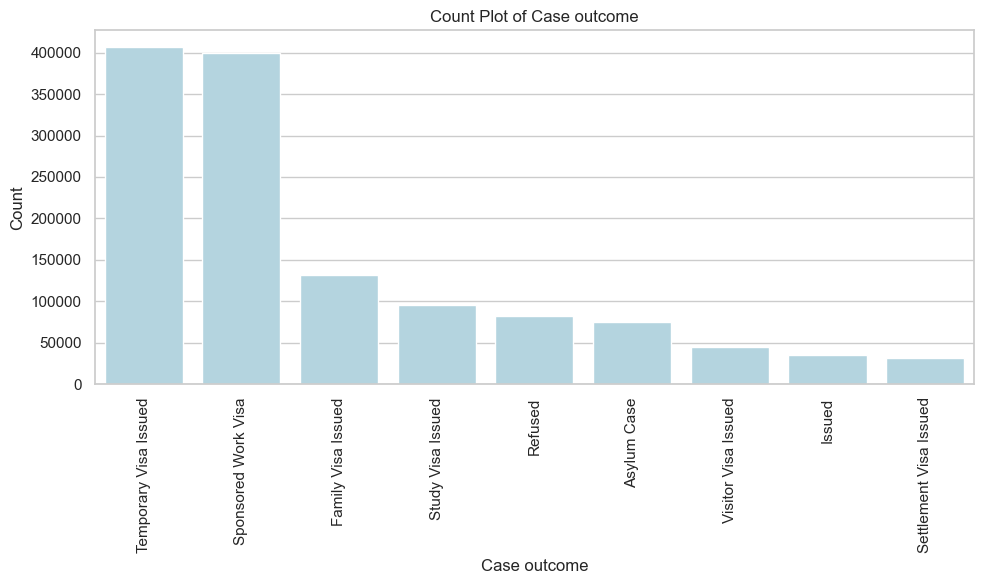

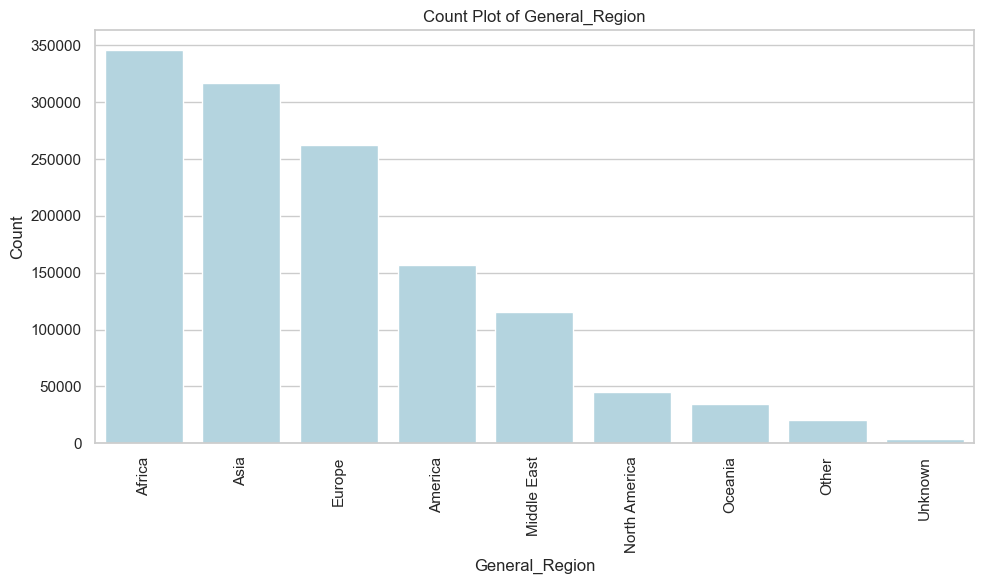

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_columns = ['Nationality', 'Occupation', 'Industry']

for col in categorical_df.columns:
    if col not in exclude_columns:
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        sns.countplot(data=categorical_df, x=col, order=categorical_df[col].value_counts().index, color='lightblue')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


In [ ]:
corr_matrix = numeric_df.corr()

In [5]:
numeric_df.corr()

,Year,Quarter,Sex,Decisions
Year,1.000000,0.019615,0.164357,-0.006556
Quarter,0.019615,1.000000,0.008733,-0.001135
Sex,0.164357,0.008733,1.000000,0.034070
Decisions,-0.006556,-0.001135,0.034070,1.000000


In [21]:
import pandas as pd

# Set display options
pd.set_option('display.float_format', '{:.1f}'.format)

# Now when you run describe, it should output numbers in a more readable format
numeric_df.describe()


,Year,Quarter,Sex,Decisions
count,1301379.0,1301379.0,1301379.0,1301379.0
mean,2015.2,2.5,2.5,88.4
std,5.9,1.1,0.8,1696.7
min,2001.0,1.0,1.0,0.0
25%,2010.0,2.0,2.0,1.0
50%,2016.0,3.0,3.0,2.0
75%,2021.0,4.0,3.0,7.0
max,2023.0,4.0,3.0,255463.0


OK this is good for now, we can probably drop Grants later

Maybe we can combined year and quarter again later as well

Let's look at correlation to "Decisions"

In [22]:
corr_with_decisions = corr_matrix["Decisions"].sort_values(ascending=False)

print(corr_with_decisions)


Decisions    1.0
Sex          0.0
Quarter     -0.0
Year        -0.0
Name: Decisions, dtype: float64


Looks like none of these have much correlation at all. Let's figure out something else - we need more data from the categorical columns

Although it's not exactly that useful in this situion, we can plot all these using scatter_matrix

We can try this again later when we get the df working with the categorical columns

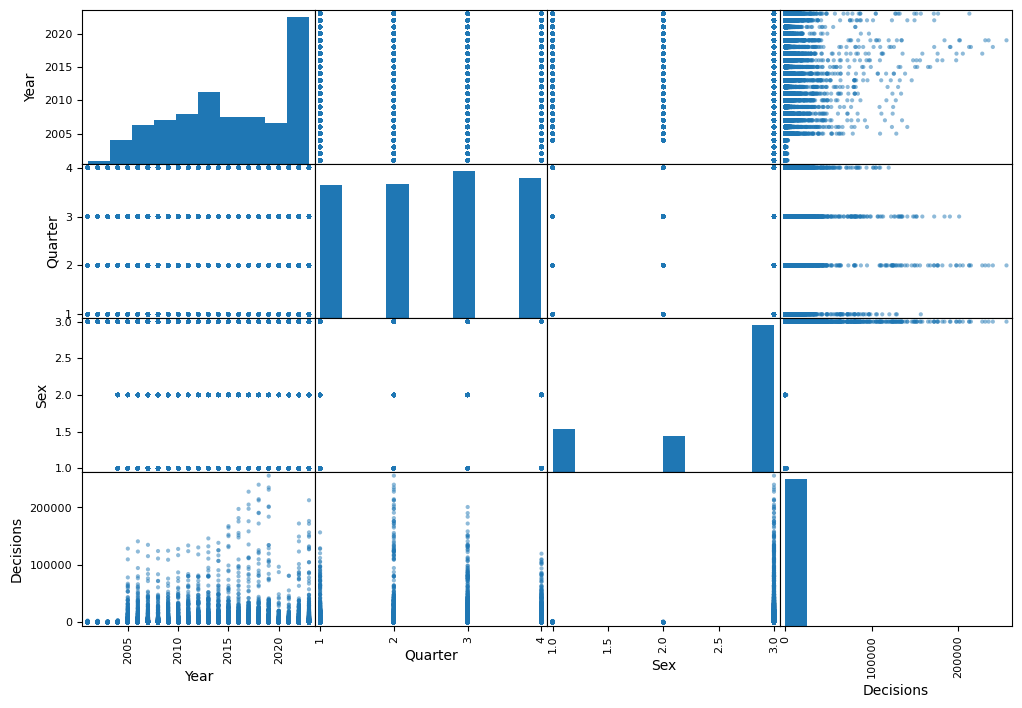

In [39]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 

attributes = ["Year", "Quarter", "Sex", "Decisions"]
scatter_matrix(model_df[attributes], figsize=(12, 8))
plt.show()

#REF: O'Reily - Aurelien Geron book

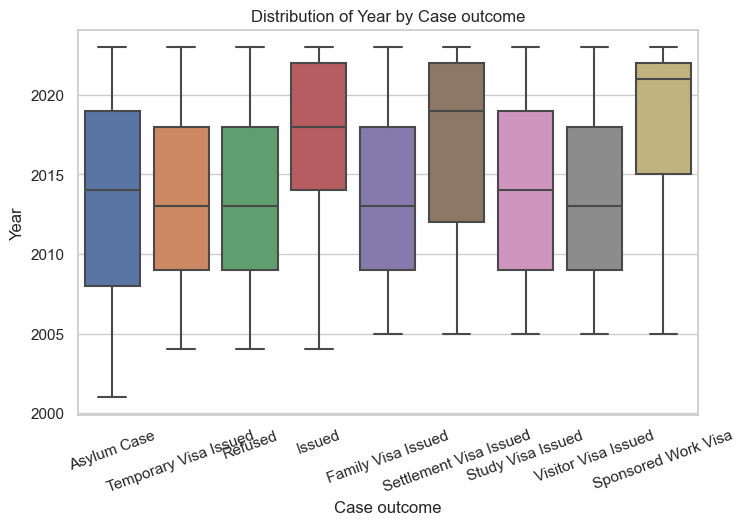

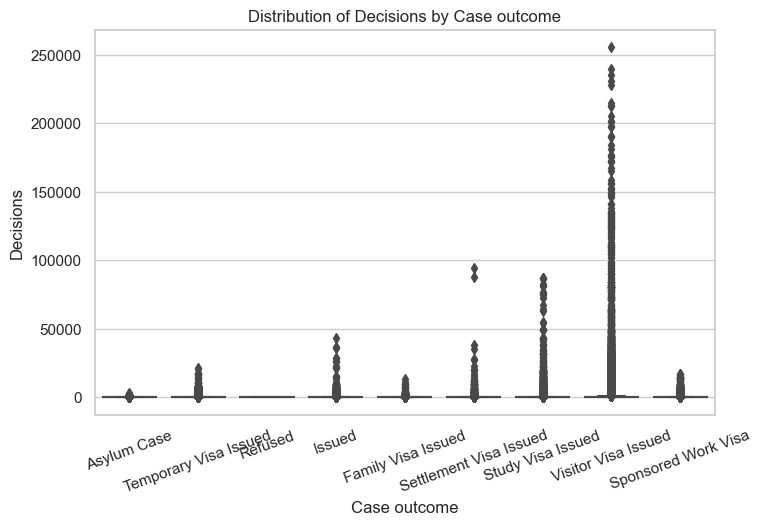

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes = ["Year", "Decisions"]

for attribute in attributes:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Case outcome", y=attribute, data=model_df)
    plt.title(f"Distribution of {attribute} by Case outcome")
    plt.xticks(rotation=20)  
    plt.show()


Later

We will also experiment with feature engineering

And look at more complex models (Random Forests, SVM, KNN)

We can also include more data, would be useful to include some cost features 